In [1]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import gym
from lunar_lander import LunarLander2QModel
from maslourl.trackers.file_logger import FileLogger

In [2]:
replay_buffer_size = 200000
training_batch_size = 64
training_start = 256
max_episodes = 5000
max_steps = 1000
target_network_replace_frequency_steps = 20
model_backup_frequency_episodes = 25
starting_epsilon = 0.5
minimum_epsilon = 0.01
epsilon_decay_factor_per_episode = 0.996
discount_factor = 0.999
train_every_x_steps = 1

In [3]:
env = gym.make('LunarLander-v2')

In [4]:
agent = LunarLander2QModel(env,max_steps, replay_buffer_size=replay_buffer_size)

In [5]:
agent.summary()

Observation space: Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)
Action space: Discrete(4)
Model: "LunarLander"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,660
Trainable params: 2,660
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps, starting_epsilon=starting_epsilon, min_epsilon=minimum_epsilon,
            epsilon_decay_for_episode=epsilon_decay_factor_per_episode, target_network_replace_frequency_steps=target_network_replace_frequency_steps,
            warmup_before_start_trainings_steps=training_start, train_every_x_steps=train_every_x_steps,training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups_medium/",
            episodes_for_average_tracking=50, file_logger=FileLogger("./logging/log_medium.csv"))

Starting episode 0
episode 0 finished in 91 steps with reward -552.71. Average reward over last 50: -552.71 And took: 13.63 seconds. 
Starting episode 1
episode 1 finished in 65 steps with reward -313.49. Average reward over last 50: -433.10 And took: 6.18 seconds. 
Starting episode 2
episode 2 finished in 115 steps with reward -316.92. Average reward over last 50: -394.37 And took: 16.84 seconds. 
Starting episode 3
episode 3 finished in 72 steps with reward -137.21. Average reward over last 50: -330.08 And took: 18.06 seconds. 
Starting episode 4
episode 4 finished in 113 steps with reward -25.93. Average reward over last 50: -269.25 And took: 31.94 seconds. 
Starting episode 5
episode 5 finished in 179 steps with reward -60.30. Average reward over last 50: -234.43 And took: 45.02 seconds. 
Starting episode 6


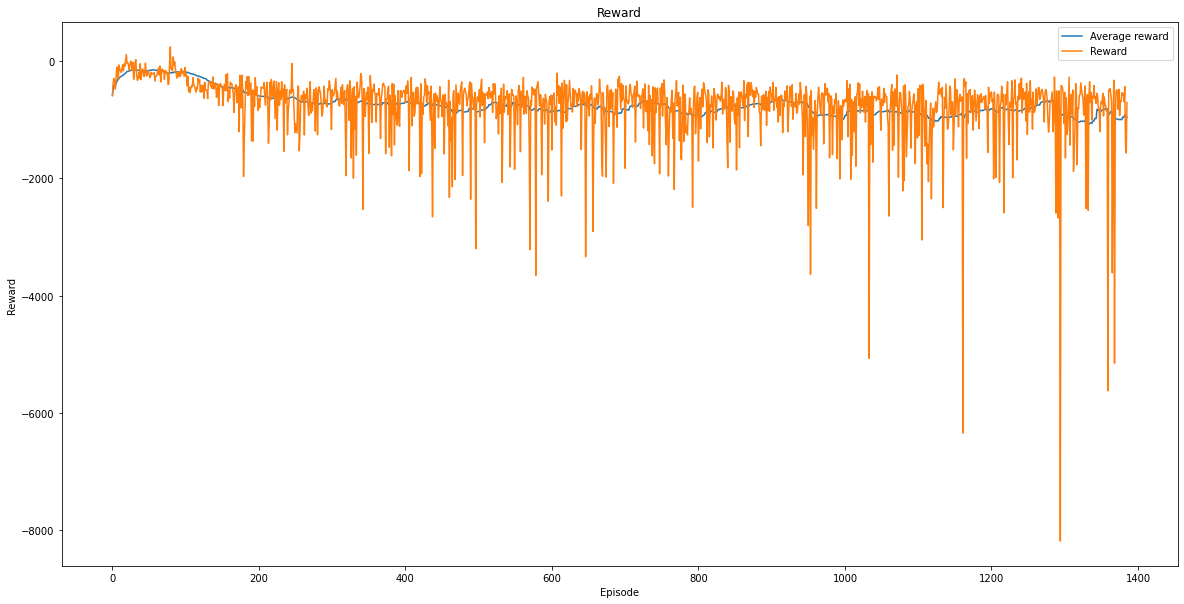

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log_medium.csv", sep=';')

plt.figure(figsize=(20,10))
plt.plot(data['average'])
plt.plot(data['reward'])
plt.title('Reward')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.legend(['Average reward', 'Reward'], loc='upper right')
plt.show()

In [19]:
agent.model.save("back_ups/model_1000.h5")

In [8]:
from tensorflow.keras.models import load_model
agent = LunarLander2QModel(env, None, 1000)
agent.load_model("back_ups/model_1000.h5")

In [14]:
agent.test(1,1000, visualize=True)

Starting episode 0


KeyboardInterrupt: 

In [9]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps, starting_epsilon=0.05, min_epsilon=minimum_epsilon,
            epsilon_decay_for_episode=epsilon_decay_factor_per_episode, target_network_replace_frequency_steps=target_network_replace_frequency_steps,
            warmup_before_start_trainings_steps=training_start, train_every_x_steps=train_every_x_steps,training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups_1000/",
            episodes_for_average_tracking=100, file_logger=FileLogger("./logging/log3.csv"))

INFO:tensorflow:Assets written to: backup_63a1ab59-7387-46ed-a095-9d355440b8d1\assets
Starting episode 0
episode 0 finished in 271 steps with reward 213.02. Average reward over last 100: 213.02 And took: 13.12 seconds. 
Starting episode 1
episode 1 finished in 133 steps with reward 13.17. Average reward over last 100: 113.10 And took: 10.80 seconds. 
Starting episode 2
episode 2 finished in 112 steps with reward -41.32. Average reward over last 100: 61.63 And took: 9.43 seconds. 
Starting episode 3
episode 3 finished in 156 steps with reward 29.85. Average reward over last 100: 53.68 And took: 12.44 seconds. 
Starting episode 4
episode 4 finished in 227 steps with reward -6.51. Average reward over last 100: 41.64 And took: 18.09 seconds. 
Starting episode 5
Updating target model
INFO:tensorflow:Assets written to: backup_5312859a-0d73-49e9-bbaa-615a6766c8cf\assets
episode 5 finished in 161 steps with reward 26.77. Average reward over last 100: 39.16 And took: 13.97 seconds. 
Starting ep

KeyboardInterrupt: 

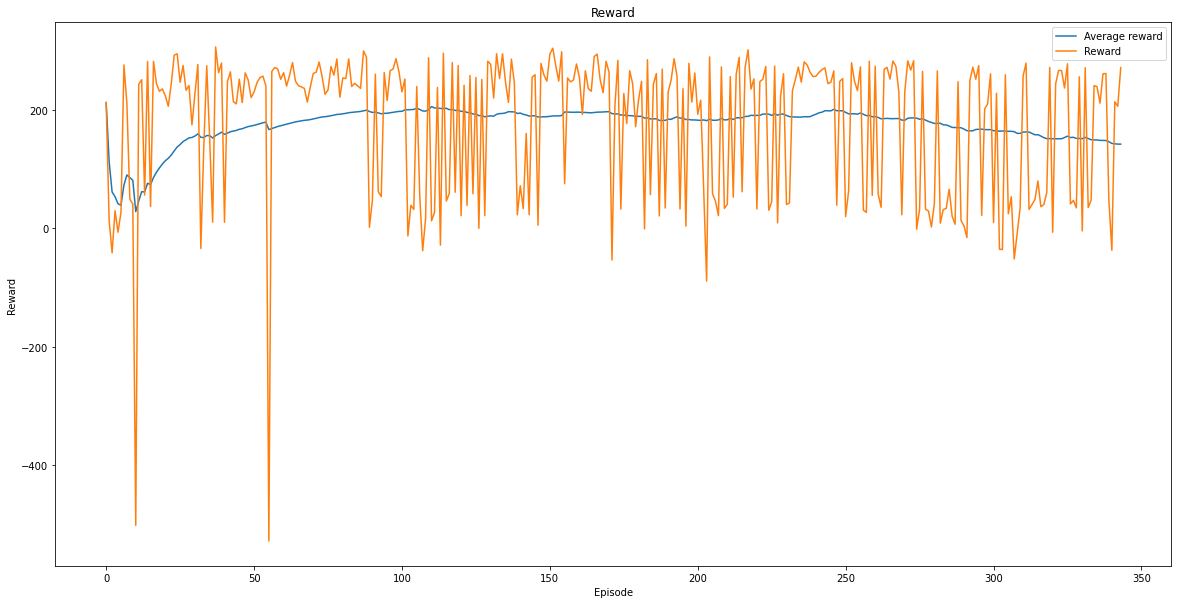

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log3.csv", sep=';')

plt.figure(figsize=(20,10))
plt.plot(data['average'])
plt.plot(data['reward'])
plt.title('Reward')
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.legend(['Average reward', 'Reward'], loc='upper right')
plt.show()

In [23]:
agent = LunarLander2QModel(env, None, 1000)
agent.load_model("back_ups_big/model_500.h5")

In [25]:
agent.test(5,1000, visualize=True)

Starting episode 0
episode 0 finished in 268 steps with reward -406.60. And took: 14.61 seconds. 
Starting episode 1
episode 1 finished in 397 steps with reward 619.26. And took: 21.50 seconds. 
Starting episode 2


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000019173AAE9D0>
Traceback (most recent call last):
  File "C:\Users\leff0\anaconda3\envs\ml\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


KeyboardInterrupt: 